<a href="https://colab.research.google.com/github/athresh/ml-for-engineers/blob/master/Bayes_Nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
!apt install libgraphviz-dev
!pip install pygraphviz
!pip install pomegranate
import pomegranate as pmg
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


#Initializing bayes net for the burglary network <br>
We initialize a bayes net for the popular burglary network by specifying the structure of the network as well as the probability distribution tables associated with each node.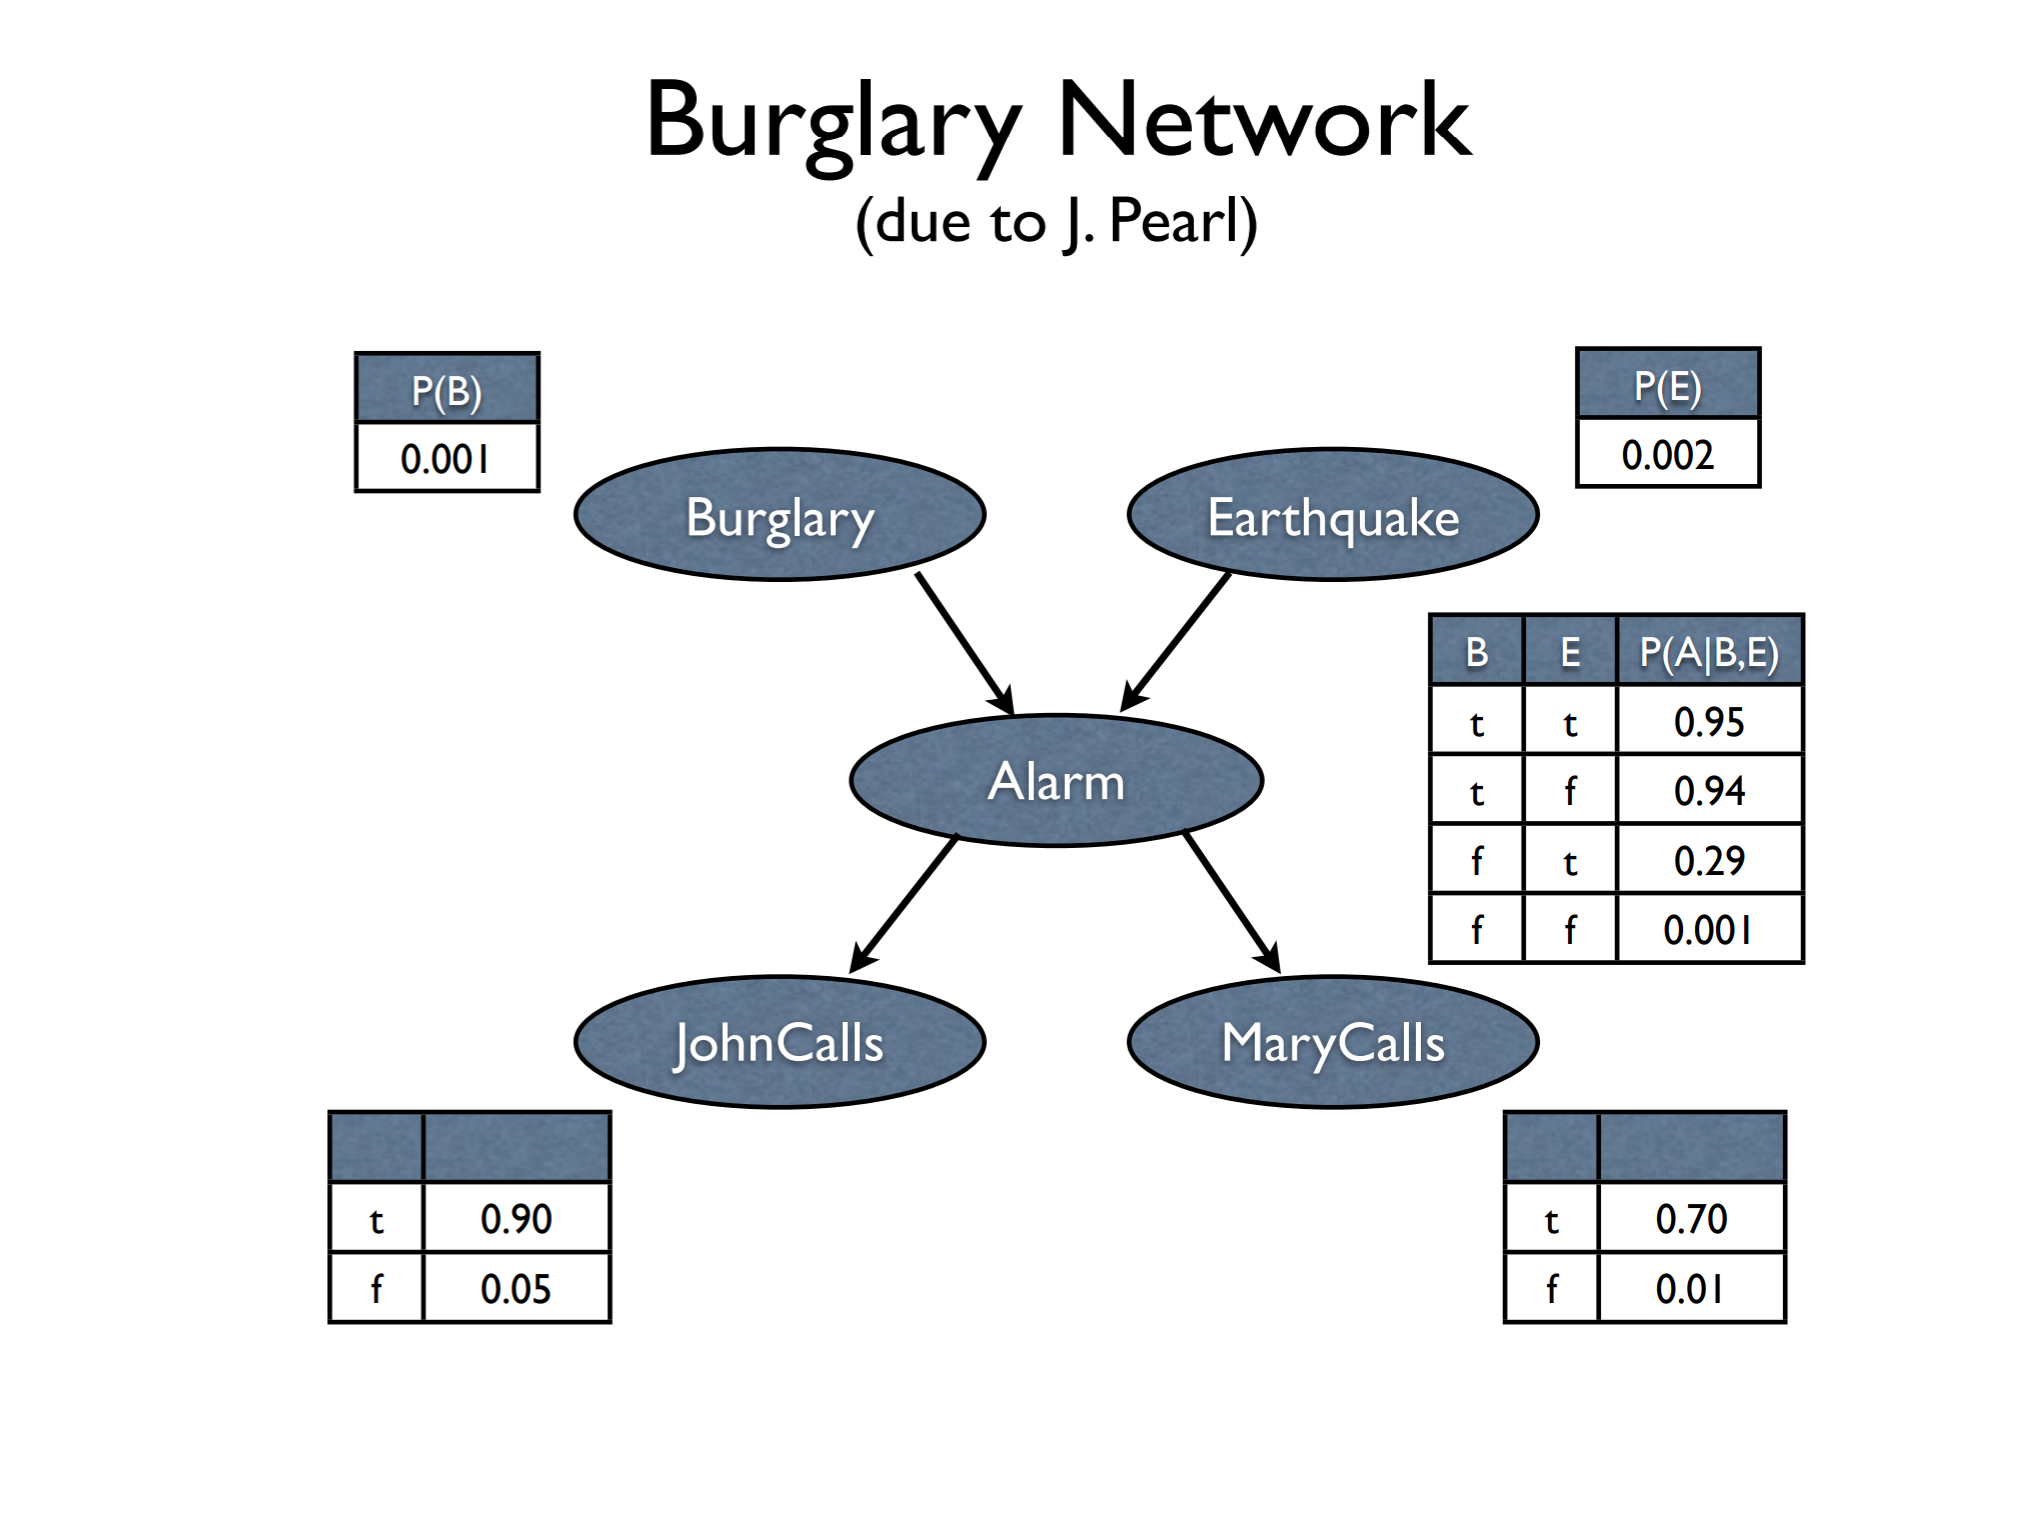

## Define the probability distribution tables

In [79]:
burglary = pmg.DiscreteDistribution({'T':0.001, 'F':0.999})
earthquake = pmg.DiscreteDistribution({'T':0.002, 'F':0.998})
alarm = pmg.ConditionalProbabilityTable(
    [['T', 'T', 'T', 0.95],
     ['T', 'T', 'F', 0.05],
     ['T', 'F', 'T', 0.94],
     ['T', 'F', 'F', 0.06],
     ['F', 'T', 'T', 0.29],
     ['F', 'T', 'F', 0.71],
     ['F', 'F', 'T', 0.001],
     ['F', 'F', 'F', 0.999]], [burglary, earthquake])
johncalls = pmg.ConditionalProbabilityTable(
    [['T', 'T', 0.9],
     ['T', 'F', 0.1],
     ['F', 'T', 0.05],
     ['F', 'F', 0.95]], [alarm])
marycalls = pmg.ConditionalProbabilityTable(
    [['T', 'T', 0.7],
     ['T', 'F', 0.3],
     ['F', 'T', 0.01],
     ['F', 'F', 0.99]], [alarm])

## Define the structure of the bayes net

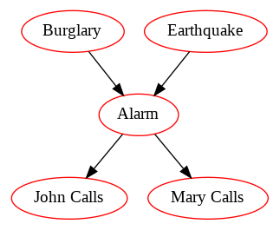

In [80]:
s1 = pmg.Node(burglary, name="Burglary")
s2 = pmg.Node(earthquake, name="Earthquake")
s3 = pmg.Node(alarm, name="Alarm")
s4 = pmg.Node(johncalls, name="John Calls")
s5 = pmg.Node(marycalls, name="Mary Calls")
model = pmg.BayesianNetwork("Burglary and alarm scenario")
model.add_states(s1,s2,s3,s4,s5)
model.add_edge(s1,s3)
model.add_edge(s2,s3)
model.add_edge(s3,s4)
model.add_edge(s3,s5)
model.bake()
model.plot()

#Calculate marginal probabilities <br>

In [81]:
def get_marginal(mdl, node_idx):
  marginal = {k:round(v, 3) for k,v in mdl.marginal()[node_idx].parameters[0].items()}
  return marginal
def p(mdl, **kwargs):
  variable_values = kwargs
  print(variable_values)
for i in range(model.state_count()):
  print(get_marginal(model, i))

{'T': 0.001, 'F': 0.999}
{'T': 0.002, 'F': 0.998}
{'F': 0.997, 'T': 0.003}
{'F': 0.948, 'T': 0.052}
{'F': 0.988, 'T': 0.012}


#Calculate joint probabilities <br>
In this exercise you will calculate the joint probability of variables under the complete evidence **['F', 'F', 'F', 'F', 'F']**. <br>
$$P(B, E, A, J, M) = P(B)P(E)P(A|B,E)P(J|A)P(M|A)$$

In [98]:
calculated_probability = 0
if np.isclose(calculated_probability,model.probability([['F','F','F','F','F']])):
  print("Joint probability calculated correctly!")
else:
  print("Joint probability calculated incorrectly")

0.9367427006189999
Joint probability calculated correctly!


In [83]:
model.probability([['F','F','F','F','F']])

0.936742700619

#Calculate conditional probabilities
The predict_proba() allows conditioning under partial evidence while marginalizing unknown variables. <br>
Queries such as "what is the probability that mary calls given that there is no earthquake, no burglary and john called?" can be answered using this function.

In [102]:
model.predict_proba([['F','F',None,'T',None]])

[array(['F', 'F', {
                      "class" : "Distribution",
                      "dtype" : "str",
                      "name" : "DiscreteDistribution",
                      "parameters" : [
                          {
                              "F" : 0.9823008849557444,
                              "T" : 0.017699115044255646
                          }
                      ],
                      "frozen" : false
                  }                                     , 'T',
        {
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "F" : 0.9777876106194635,
                    "T" : 0.022212389380536466
                }
            ],
            "frozen" : false
        }                                     ], dtype=object)]

## Does probability of mary calling depend on john calling?<br>


In [110]:
model.predict_proba([['F','F',None,'F',None]])

[array(['F', 'F', {
                      "class" : "Distribution",
                      "dtype" : "str",
                      "name" : "DiscreteDistribution",
                      "parameters" : [
                          {
                              "F" : 0.9998946425749352,
                              "T" : 0.00010535742506480039
                          }
                      ],
                      "frozen" : false
                  }                                       , 'F',
        {
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "F" : 0.9899273033767053,
                    "T" : 0.010072696623294783
                }
            ],
            "frozen" : false
        }                                     ], dtype=object)]

## What if we know the status of the alarm?

In [111]:
model.predict_proba([['F','F','T','F',None]])

[array(['F', 'F', 'T', 'F', {
                                "class" : "Distribution",
                                "dtype" : "str",
                                "name" : "DiscreteDistribution",
                                "parameters" : [
                                    {
                                        "F" : 0.30000000000000016,
                                        "T" : 0.6999999999999998
                                    }
                                ],
                                "frozen" : false
                            }                                     ],
       dtype=object)]

In [112]:
model.predict_proba([['F','T','T','T',None]])

[array(['F', 'T', 'T', 'T', {
                                "class" : "Distribution",
                                "dtype" : "str",
                                "name" : "DiscreteDistribution",
                                "parameters" : [
                                    {
                                        "F" : 0.30000000000000016,
                                        "T" : 0.6999999999999998
                                    }
                                ],
                                "frozen" : false
                            }                                     ],
       dtype=object)]

# Learning model parameters from data <br>
This is a small synthetic data set from Lauritzen and Spiegelhalter (1988) about lung diseases (tuberculosis, lung cancer or bronchitis) and visits to Asia. <br>

The asia dataset contains the following variables:
*   D (dyspnoea), a two-level factor with levels yes and no.

*   T (tuberculosis), a two-level factor with levels yes and no.

*   L (lung cancer), a two-level factor with levels yes and no.

*   B (bronchitis), a two-level factor with levels yes and no.

*   A (visit to Asia), a two-level factor with levels yes and no.

*   S (smoking), a two-level factor with levels yes and no.

*   X (chest X-ray), a two-level factor with levels yes and no.

*   E (tuberculosis versus lung cancer/bronchitis), a two-level factor with levels yes and no.


In [85]:
url = 'https://raw.githubusercontent.com/athresh/ml-for-engineers/master/datasets/asia.csv'
data = pd.read_csv(url)
data.describe().T

,count,unique,top,freq
A,4998,2,no,4956
S,4998,2,yes,2513
T,4998,2,no,4954
L,4998,2,no,4670
B,4998,2,yes,2547
E,4998,2,no,4630
X,4998,2,no,4429
D,4998,2,no,2650


((), (), (0,), (1,), (1,), (2, 3), (5,), (4, 5))


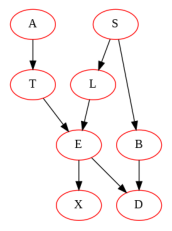

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data, test_size=0.2, random_state=1)
model_asia_1 = pmg.BayesianNetwork.from_structure(X_train, structure=((), (), (0,), (1,), (1,), (2, 3), (5,), (4, 5)), state_names=data.columns)
print(model_asia_1.structure)
model_asia_1.plot()

In [87]:
labels = {i:data.columns[i] for i in range(data.shape[1])}
for k,v in labels.items():
  print("Marginal probability distribution of {} = {}".format(v, get_marginal(model_asia_1, k)))

Marginal probability distribution of A = {'no': 0.992, 'yes': 0.008}
Marginal probability distribution of S = {'no': 0.497, 'yes': 0.503}
Marginal probability distribution of T = {'yes': 0.01, 'no': 0.99}
Marginal probability distribution of L = {'yes': 0.064, 'no': 0.936}
Marginal probability distribution of B = {'yes': 0.503, 'no': 0.497}
Marginal probability distribution of E = {'yes': 0.072, 'no': 0.928}
Marginal probability distribution of X = {'yes': 0.11, 'no': 0.89}
Marginal probability distribution of D = {'yes': 0.466, 'no': 0.534}


In [88]:
ll_test = model_asia_1.log_probability(X_test.to_numpy())
np.mean(ll_test)

-2.2440422116849406

In [89]:
ll_train = model_asia_1.log_probability(X_train.to_numpy())
np.mean(ll_train)

-2.1941158378119647

# Learning both structure and parameters from the data <br>
The 'exact' algorithm uses A* search to find the network that optimizes the following scoring function(negative of BIC): $$log(P(D|M)) - \frac{log(|D|)}{2}*|M| $$

((), (), (), (1,), (1,), (2, 3), (5,), (4, 5))


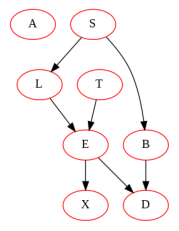

In [90]:
model_asia_2 = pmg.BayesianNetwork.from_samples(X_train, algorithm='exact', state_names=data.columns)
print(model_asia_2.structure)
model_asia_2.plot()

In [91]:
ll_test_2 = model_asia_2.log_probability(X_test.to_numpy())
np.mean(ll_test_2)

-2.243713664184552